In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [25]:
from sklearn.datasets import load_iris
iris = load_iris()

In [26]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [27]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
df['target']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [29]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [30]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [31]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [32]:
df[48:52]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor


In [33]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

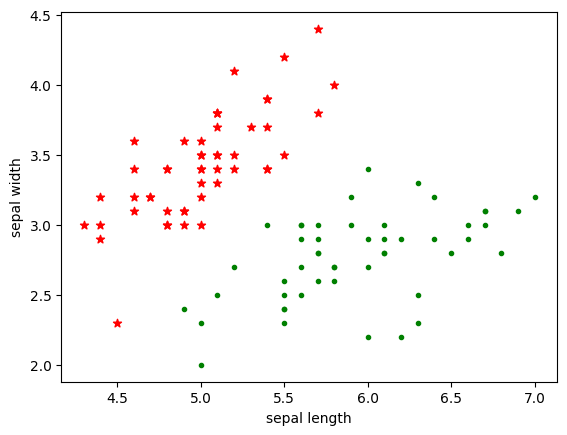

In [34]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "red", marker= '*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "green", marker= '.')

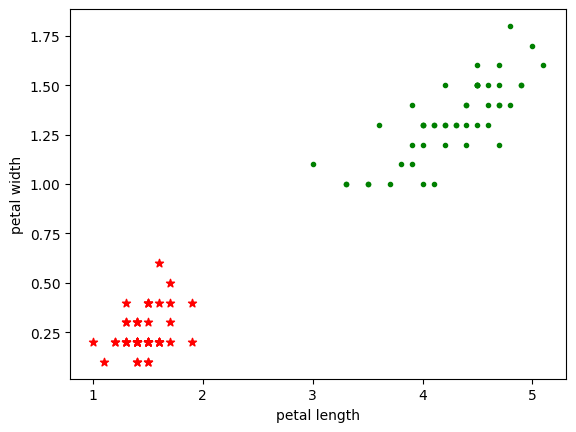

In [35]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = "red", marker= '*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = "green", marker= '.')

In [36]:
from sklearn.model_selection import train_test_split
x = df.drop(['target', 'flower_name'], axis=1)
y = df.target

In [37]:
X_train, X_test, y_train, y_test =train_test_split(x, y, test_size=0.2)

In [38]:
from sklearn.svm import SVC
model = SVC()

In [39]:
model.fit(X_train, y_train)

SVC()

In [40]:
model.score(X_test, y_test)

1.0

In [41]:
X_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
78,6.0,2.9,4.5,1.5
71,6.1,2.8,4.0,1.3
93,5.0,2.3,3.3,1.0
111,6.4,2.7,5.3,1.9
100,6.3,3.3,6.0,2.5


In [42]:
model.predict([[6.8,3.2,5.9,2.3]])

c:\python3.11.4\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [43]:
# tuning parameters, Regularization
# more value of C means high Regularization and model overfitting
model_C = SVC(C=10)
model_C.fit(X_train,y_train)
model_C.score(X_test,y_test)

1.0

In [44]:
# setting gamma
# score changing at gamma = 4, before it the score was 1.0
# score value is depreciating as gamma increases
#  the value of gamma varies case to case 
# sometimes high gamma value improves the score
model_g = SVC(gamma=4)
model_g.fit(X_train,y_train)
model_g.score(X_test,y_test)

1.0

In [45]:
# changing value of kernel 
model_linear_kernel = SVC(kernel='linear')
model_linear_kernel.fit(X_train, y_train)
model_linear_kernel.score(X_test, y_test)

1.0